### Imports

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### load dataset

In [3]:
data = pd.read_csv('data/classified_data.csv', sep=',', header=0)

In [4]:
data.head()

,created_at,id,lng,lat,topic,sentiment,stance,gender,temperature_avg,aggressiveness,text,tb_polarity,tb_subjectivity,hf_label,hf_score
0,2007-03-27 14:27:38+00:00,13633131,NaN,NaN,Weather Extremes,0.752387,believer,male,NaN,not aggressive,USER_REF with global warming you will be able ...,0.242262,0.456548,positive,0.868611
1,2007-04-11 09:27:27+00:00,24477281,-2.716577,51.14804,Seriousness of Gas Emissions,0.135546,believer,male,3.155858,not aggressive,USER_REF - you need a billion dollar project t...,0.000000,0.000000,neutral,0.564668
2,2007-04-26 17:49:51+00:00,40935582,-122.332070,47.60621,Seriousness of Gas Emissions,0.072492,believer,male,-0.245944,aggressive,listening to my eas professor pretend that he ...,0.000000,0.000000,negative,0.589993
3,2007-05-07 13:10:41+00:00,53214992,NaN,NaN,Global stance,-0.485976,believer,male,NaN,not aggressive,an environment agency predicts climate change ...,0.000000,0.000000,neutral,0.679772
4,2007-05-22 16:38:15+00:00,74191762,NaN,NaN,Global stance,-0.180456,neutral,male,NaN,aggressive,"since interest rate is positive, future price ...",0.056818,0.198864,neutral,0.874980


In [5]:
data['topic_code'] = pd.factorize(data['topic'])[0]
data['gender_code'] = pd.factorize(data['gender'])[0]
data['stance_code'] = pd.factorize(data['stance'])[0]
data['aggressiveness_code'] = pd.factorize(data['aggressiveness'])[0]
data['label_code'] = pd.factorize(data['hf_label'])[0]

In [6]:
data.head()

,created_at,id,lng,lat,topic,sentiment,stance,gender,temperature_avg,aggressiveness,text,tb_polarity,tb_subjectivity,hf_label,hf_score,topic_code,gender_code,stance_code,aggressiveness_code,label_code
0,2007-03-27 14:27:38+00:00,13633131,NaN,NaN,Weather Extremes,0.752387,believer,male,NaN,not aggressive,USER_REF with global warming you will be able ...,0.242262,0.456548,positive,0.868611,0,0,0,0,0
1,2007-04-11 09:27:27+00:00,24477281,-2.716577,51.14804,Seriousness of Gas Emissions,0.135546,believer,male,3.155858,not aggressive,USER_REF - you need a billion dollar project t...,0.000000,0.000000,neutral,0.564668,1,0,0,0,1
2,2007-04-26 17:49:51+00:00,40935582,-122.332070,47.60621,Seriousness of Gas Emissions,0.072492,believer,male,-0.245944,aggressive,listening to my eas professor pretend that he ...,0.000000,0.000000,negative,0.589993,1,0,0,1,2
3,2007-05-07 13:10:41+00:00,53214992,NaN,NaN,Global stance,-0.485976,believer,male,NaN,not aggressive,an environment agency predicts climate change ...,0.000000,0.000000,neutral,0.679772,2,0,0,0,1
4,2007-05-22 16:38:15+00:00,74191762,NaN,NaN,Global stance,-0.180456,neutral,male,NaN,aggressive,"since interest rate is positive, future price ...",0.056818,0.198864,neutral,0.874980,2,0,1,1,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68283 entries, 0 to 68282
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   created_at           68283 non-null  object 
 1   id                   68283 non-null  int64  
 2   lng                  24797 non-null  float64
 3   lat                  24797 non-null  float64
 4   topic                68283 non-null  object 
 5   sentiment            68283 non-null  float64
 6   stance               68283 non-null  object 
 7   gender               68283 non-null  object 
 8   temperature_avg      24797 non-null  float64
 9   aggressiveness       68283 non-null  object 
 10  text                 68283 non-null  object 
 11  tb_polarity          68283 non-null  float64
 12  tb_subjectivity      68283 non-null  float64
 13  hf_label             68283 non-null  object 
 14  hf_score             68283 non-null  float64
 15  topic_code           68283 non-null 

In [8]:
data.corr()

,id,lng,lat,sentiment,temperature_avg,tb_polarity,tb_subjectivity,hf_score,topic_code,gender_code,stance_code,aggressiveness_code,label_code
id,1.000000,0.053515,0.002062,0.072136,0.137895,0.040647,0.080491,0.029377,0.129992,0.019574,-0.207586,-0.057390,-0.016528
lng,0.053515,1.000000,-0.607683,0.055694,-0.006862,0.017822,-0.008507,0.000322,0.047151,0.037178,-0.069261,-0.068381,-0.036820
lat,0.002062,-0.607683,1.000000,0.001668,0.132806,-0.005693,0.003729,0.006144,0.011365,-0.024020,0.003294,0.020484,-0.021467
sentiment,0.072136,0.055694,0.001668,1.000000,0.027654,0.378311,-0.002939,0.006041,0.094196,0.016097,-0.142988,-0.137559,-0.524086
temperature_avg,0.137895,-0.006862,0.132806,0.027654,1.000000,0.022798,0.003472,0.011176,0.032752,0.008372,-0.056031,-0.012517,-0.020068
tb_polarity,0.040647,0.017822,-0.005693,0.378311,0.022798,1.000000,0.109340,-0.058511,0.021792,0.010677,-0.030818,-0.033342,-0.274968
tb_subjectivity,0.080491,-0.008507,0.003729,-0.002939,0.003472,0.109340,1.000000,0.004658,-0.033802,0.011642,-0.046709,-0.024806,0.010152
hf_score,0.029377,0.000322,0.006144,0.006041,0.011176,-0.058511,0.004658,1.000000,0.001419,0.008846,0.001735,-0.002136,-0.012719
topic_code,0.129992,0.047151,0.011365,0.094196,0.032752,0.021792,-0.033802,0.001419,1.000000,-0.002034,-0.150462,0.023696,-0.085156
gender_code,0.019574,0.037178,-0.024020,0.016097,0.008372,0.010677,0.011642,0.008846,-0.002034,1.000000,-0.036285,-0.016068,-0.003248


In [9]:
data.describe()

,id,lng,lat,sentiment,temperature_avg,tb_polarity,tb_subjectivity,hf_score,topic_code,gender_code,stance_code,aggressiveness_code,label_code
count,6.828300e+04,24797.000000,24797.000000,68283.000000,24797.000000,68283.000000,68283.000000,68283.000000,68283.000000,68283.000000,68283.000000,68283.000000,68283.000000
mean,8.063511e+17,-43.507358,34.138373,-0.026242,1.204358,0.045078,0.297883,0.729627,3.007205,0.337170,0.284903,0.262642,1.288857
std,3.268015e+17,76.813557,23.332296,0.426249,3.771311,0.226309,0.276791,0.137312,2.499572,0.529805,0.581506,0.440073,0.649723
min,1.363313e+07,-161.755833,-76.050000,-0.978728,-18.063744,-1.000000,0.000000,0.338455,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.757466e+17,-94.250550,33.749000,-0.404520,-1.184536,0.000000,0.000000,0.613759,1.000000,0.000000,0.000000,0.000000,1.000000
50%,9.439078e+17,-76.610759,40.349274,-0.037812,1.177470,0.000000,0.262500,0.738494,2.000000,0.000000,0.000000,0.000000,1.000000
75%,1.037260e+18,-0.127647,47.166670,0.367817,3.858516,0.136364,0.500000,0.848753,4.000000,1.000000,0.000000,1.000000,2.000000
max,1.178898e+18,178.442166,79.994720,0.976721,17.907597,1.000000,1.000000,0.991963,9.000000,2.000000,2.000000,1.000000,2.000000


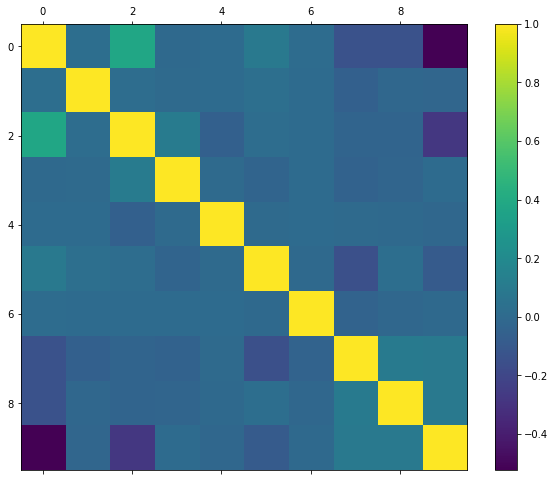

In [10]:
f = plt.figure(figsize=(10, 8))
plt.matshow(data.drop(['id', 'lng', 'lat'], axis=1).corr(), fignum=f.number)
plt.colorbar()

<AxesSubplot:>

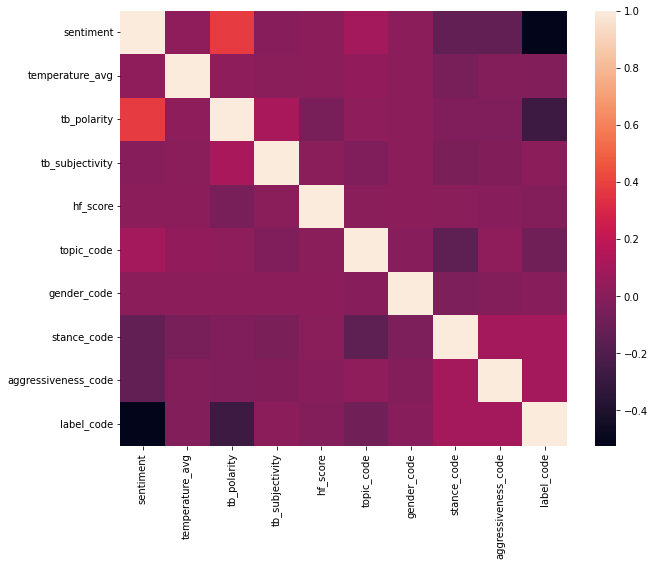

In [11]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.drop(['id', 'lng', 'lat'], axis=1).corr()
sns.heatmap(corr, ax=ax)

### gender stats
as one can see, there are no noticeable differences for the value distributions throughout the gender

<AxesSubplot:xlabel='gender', ylabel='sentiment'>

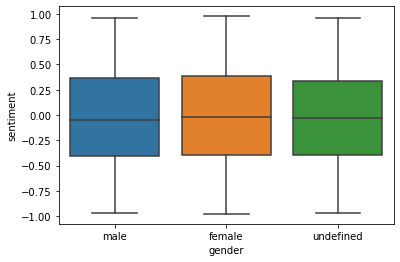

In [12]:
sns.boxplot(x='gender', y='sentiment', data=data)

<AxesSubplot:xlabel='gender', ylabel='temperature_avg'>

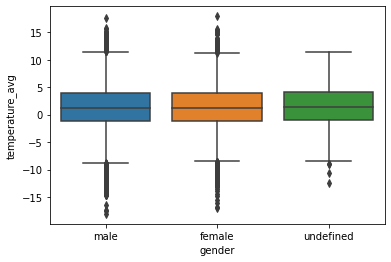

In [13]:
sns.boxplot(x='gender', y='temperature_avg', data=data)

<AxesSubplot:xlabel='gender', ylabel='tb_polarity'>

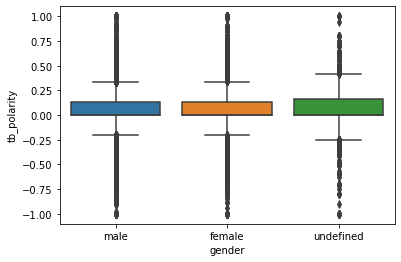

In [14]:
sns.boxplot(x='gender', y='tb_polarity', data=data)

<AxesSubplot:xlabel='gender', ylabel='tb_subjectivity'>

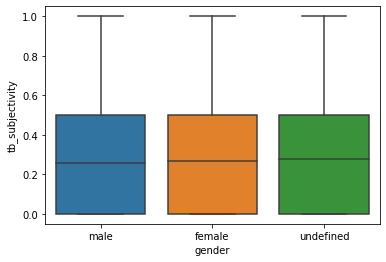

In [15]:
sns.boxplot(x='gender', y='tb_subjectivity', data=data)

<AxesSubplot:xlabel='gender', ylabel='hf_score'>

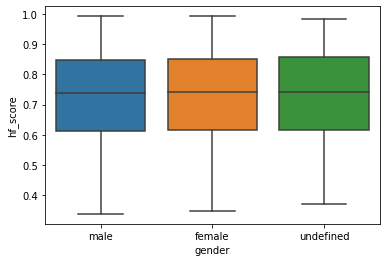

In [16]:
sns.boxplot(x='gender', y='hf_score', data=data)

### topic stats
here the values seem to vary a bit from topic to topic

<AxesSubplot:xlabel='topic', ylabel='sentiment'>

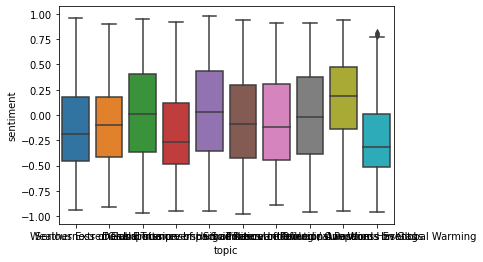

In [17]:
sns.boxplot(x='topic', y='sentiment', data=data)

<AxesSubplot:xlabel='topic', ylabel='temperature_avg'>

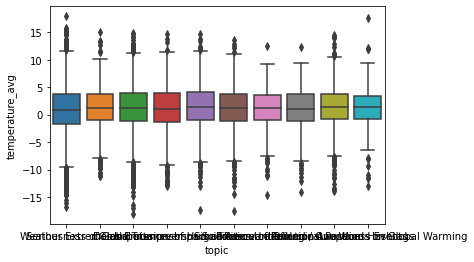

In [18]:
sns.boxplot(x='topic', y='temperature_avg', data=data)

<AxesSubplot:xlabel='topic', ylabel='tb_polarity'>

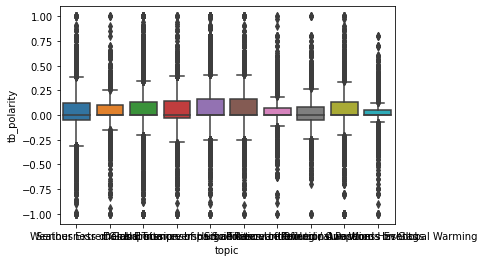

In [19]:
sns.boxplot(x='topic', y='tb_polarity', data=data)

<AxesSubplot:xlabel='topic', ylabel='tb_subjectivity'>

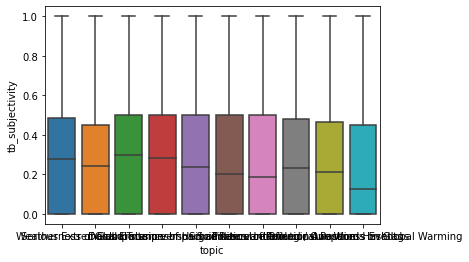

In [20]:
sns.boxplot(x='topic', y='tb_subjectivity', data=data)

<AxesSubplot:xlabel='topic', ylabel='hf_score'>

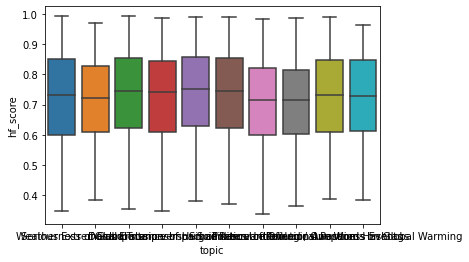

In [21]:
sns.boxplot(x='topic', y='hf_score', data=data)

### stance stats
in the case of the sentiment a difference between the stance can be seen

<AxesSubplot:xlabel='stance', ylabel='sentiment'>

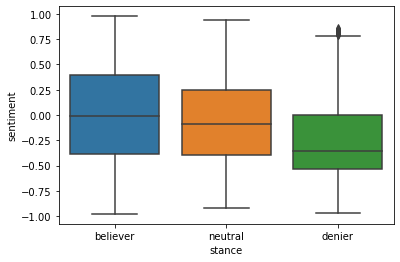

In [23]:
sns.boxplot(x='stance', y='sentiment', data=data)

<AxesSubplot:xlabel='stance', ylabel='temperature_avg'>

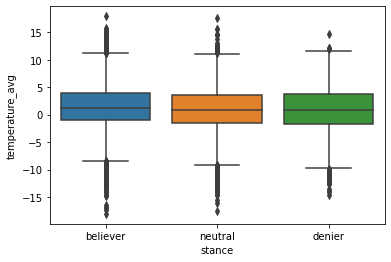

In [24]:
sns.boxplot(x='stance', y='temperature_avg', data=data)

<AxesSubplot:xlabel='stance', ylabel='tb_polarity'>

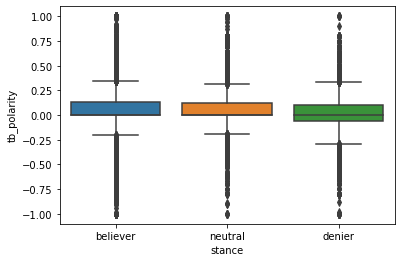

In [25]:
sns.boxplot(x='stance', y='tb_polarity', data=data)

<AxesSubplot:xlabel='stance', ylabel='tb_subjectivity'>

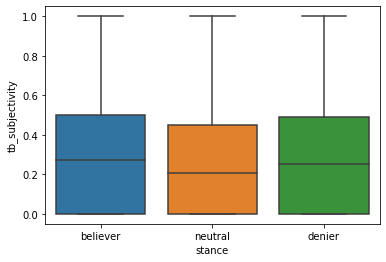

In [26]:
sns.boxplot(x='stance', y='tb_subjectivity', data=data)

<AxesSubplot:xlabel='stance', ylabel='hf_score'>

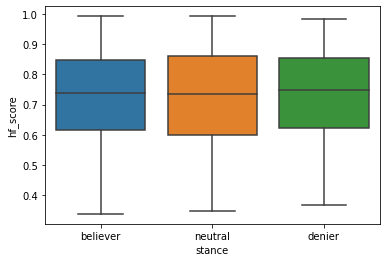

In [27]:
sns.boxplot(x='stance', y='hf_score', data=data)